# Implement simple Autoregressive model

自回歸模型 (AR 模型) 表示為：
\begin{equation}
x_t = \phi x_{t-1} + \epsilon_t
\end{equation}
其中，$\phi$ 是模型參數，$\epsilon_t$ 是均值為零的random noise

- 目標最大化以下條件概率的似然函數:
\begin{equation}
L(\phi) = \prod_{t=2}^{T} p(x_t \mid x_{t-1}; \phi)
\end{equation}
假設 $\epsilon_t$ 服從正態分佈 $N(0, \sigma^2)$，條件概率可以表示為：
\begin{equation}
p(x_t \mid x_{t-1}; \phi) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_t - \phi x_{t-1})^2}{2\sigma^2}\right)
\end{equation}

- 我們可以通過最大化對數似然函數來估計參數 $\phi$：
\begin{equation}
\log L(\phi) = \sum_{t=2}^{T} \log p(x_t \mid x_{t-1}; \phi)
\end{equation}

    對數似然函數可以寫成：
\begin{equation}
\log L(\phi) = -\frac{T-1}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=2}^{T} (x_t - \phi x_{t-1})^2
\end{equation}

$\epsilon_t$ 服從正態分佈 $N(0, \sigma^2)$ 條件概率的推導:

- ![AR_cond](pictures/AR_cond.png)

$\epsilon_t$ 服從正態分佈，透過最大化似然函數（Maximum Likelihood Estimation, MLE）來求得 正態分佈 $N(0, \sigma^2)$ 的均值和方差:

- ![MLE_1](pictures/MLE_1.png)

- ![MLE_2](pictures/MLE_2.png)

最大化似然函數（Maximum Likelihood Estimation, MLE）公式化簡:

- ![MLE_function](pictures/MLE_function.png)

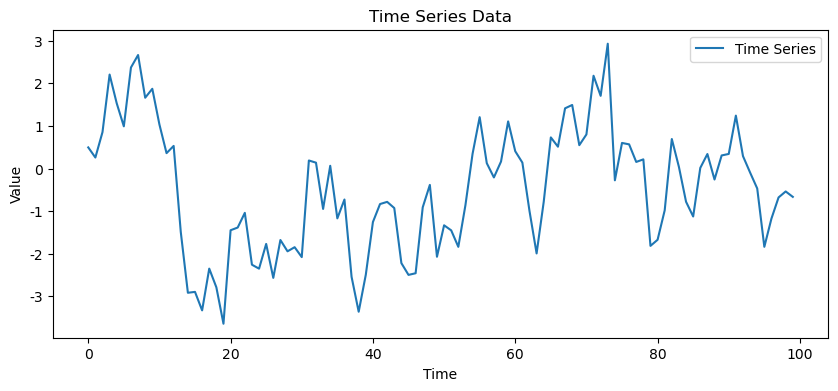

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 模擬數據生成
np.random.seed(42)
T = 100  # 時間序列長度
phi_true = 0.8  # 真實的模型參數
sigma = 1  # 噪聲的標準差
x = np.zeros(T)
x[0] = np.random.normal(0, sigma)
for t in range(1, T):
    x[t] = phi_true * x[t-1] + np.random.normal(0, sigma)

# 可視化結果
plt.figure(figsize=(10, 4))
plt.plot(x, label='Time Series')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [8]:
x[1:]

array([ 0.25910702,  0.85497416,  2.20700918,  1.53145397,  0.99102622,
        2.37203379,  2.66506176,  1.66257502,  1.87262006,  1.03467836,
        0.36201293,  0.53157262, -1.48802215, -2.91533555, -2.89455597,
       -3.3284759 , -2.34853339, -2.78685078, -3.64178433, -1.44777869,
       -1.38399926, -1.0396712 , -2.25648515, -2.34957084, -1.76873408,
       -2.56598084, -1.67708666, -1.94230802, -1.84554016, -2.07813874,
        0.18976719,  0.13831653, -0.94705771,  0.06489875, -1.16892465,
       -0.72627613, -2.54069103, -3.36073887, -2.49172986, -1.25491731,
       -0.83256556, -0.78170073, -0.92646428, -2.21969342, -2.49559894,
       -2.45711792, -0.90857211, -0.3832394 , -2.06963168, -1.33162137,
       -1.45037938, -1.8372255 , -0.85810411,  0.34451623,  1.2068931 ,
        0.12629696, -0.20817481,  0.16472359,  1.107324  ,  0.40668496,
        0.13968899, -0.99458378, -1.99187365, -0.7809731 ,  0.73146155,
        0.51315912,  1.41406019,  1.49288418,  0.54918759,  0.80

In [9]:
x[:-1]

array([ 0.49671415,  0.25910702,  0.85497416,  2.20700918,  1.53145397,
        0.99102622,  2.37203379,  2.66506176,  1.66257502,  1.87262006,
        1.03467836,  0.36201293,  0.53157262, -1.48802215, -2.91533555,
       -2.89455597, -3.3284759 , -2.34853339, -2.78685078, -3.64178433,
       -1.44777869, -1.38399926, -1.0396712 , -2.25648515, -2.34957084,
       -1.76873408, -2.56598084, -1.67708666, -1.94230802, -1.84554016,
       -2.07813874,  0.18976719,  0.13831653, -0.94705771,  0.06489875,
       -1.16892465, -0.72627613, -2.54069103, -3.36073887, -2.49172986,
       -1.25491731, -0.83256556, -0.78170073, -0.92646428, -2.21969342,
       -2.49559894, -2.45711792, -0.90857211, -0.3832394 , -2.06963168,
       -1.33162137, -1.45037938, -1.8372255 , -0.85810411,  0.34451623,
        1.2068931 ,  0.12629696, -0.20817481,  0.16472359,  1.107324  ,
        0.40668496,  0.13968899, -0.99458378, -1.99187365, -0.7809731 ,
        0.73146155,  0.51315912,  1.41406019,  1.49288418,  0.54

scipy.optimize.minimize: find the minimun
- Minimization of scalar function of one or more variables.
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [10]:
# 似然函數
def negative_log_likelihood(phi, x):
    T = len(x)
    residuals = x[1:] - phi * x[:-1]
    sigma2 = np.var(residuals)
    nll = 0.5 * T * np.log(2 * np.pi * sigma2) + 0.5 / sigma2 * np.sum(residuals**2)
    return nll

# 最小化負對數似然
# 這裡我們使用 minimize 函數來最小化負對數似然
# x0: 是我們的初始值
# args: 傳遞給目標函數及導數的其他參數
result = minimize(negative_log_likelihood, x0=0.5, args=(x,))
phi_estimated = result.x[0]

print(f"真實的 phi: {phi_true}")
print(f"估計的 phi: {phi_estimated}")

真實的 phi: 0.8
估計的 phi: 0.8071493387129419
